# Download dataset

In [ ]:
!pip install kagglehub

# import librarys

In [1]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Reading data

In [2]:
# Download latest version
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

print("Path to dataset files:", path)

100%|██████████| 12.3k/12.3k [00:00<00:00, 20.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/the-boston-houseprice-data/versions/1


In [9]:
df = pd.read_csv(f"{path}/boston.csv")

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


# EDA

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [13]:
df.duplicated().sum()

np.int64(0)

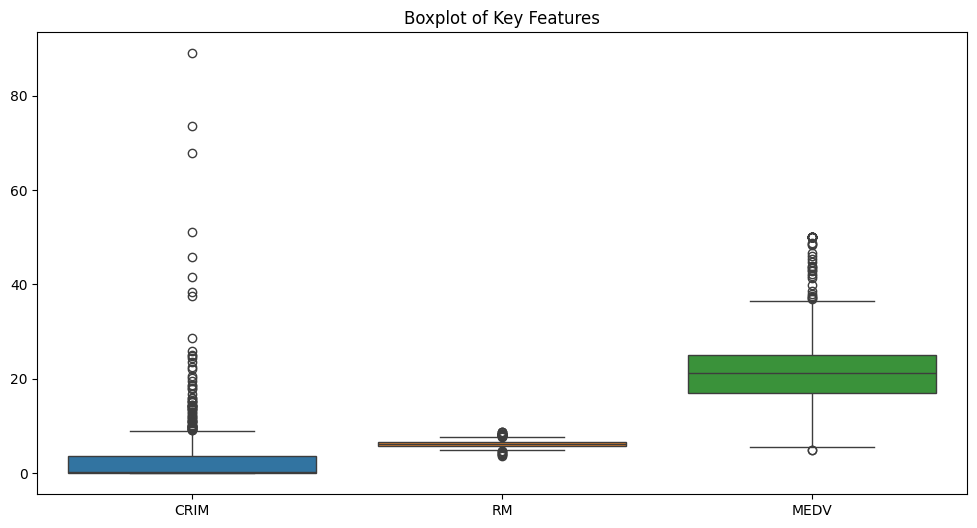

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CRIM', 'RM', 'MEDV']])
plt.title('Boxplot of Key Features')
plt.show()

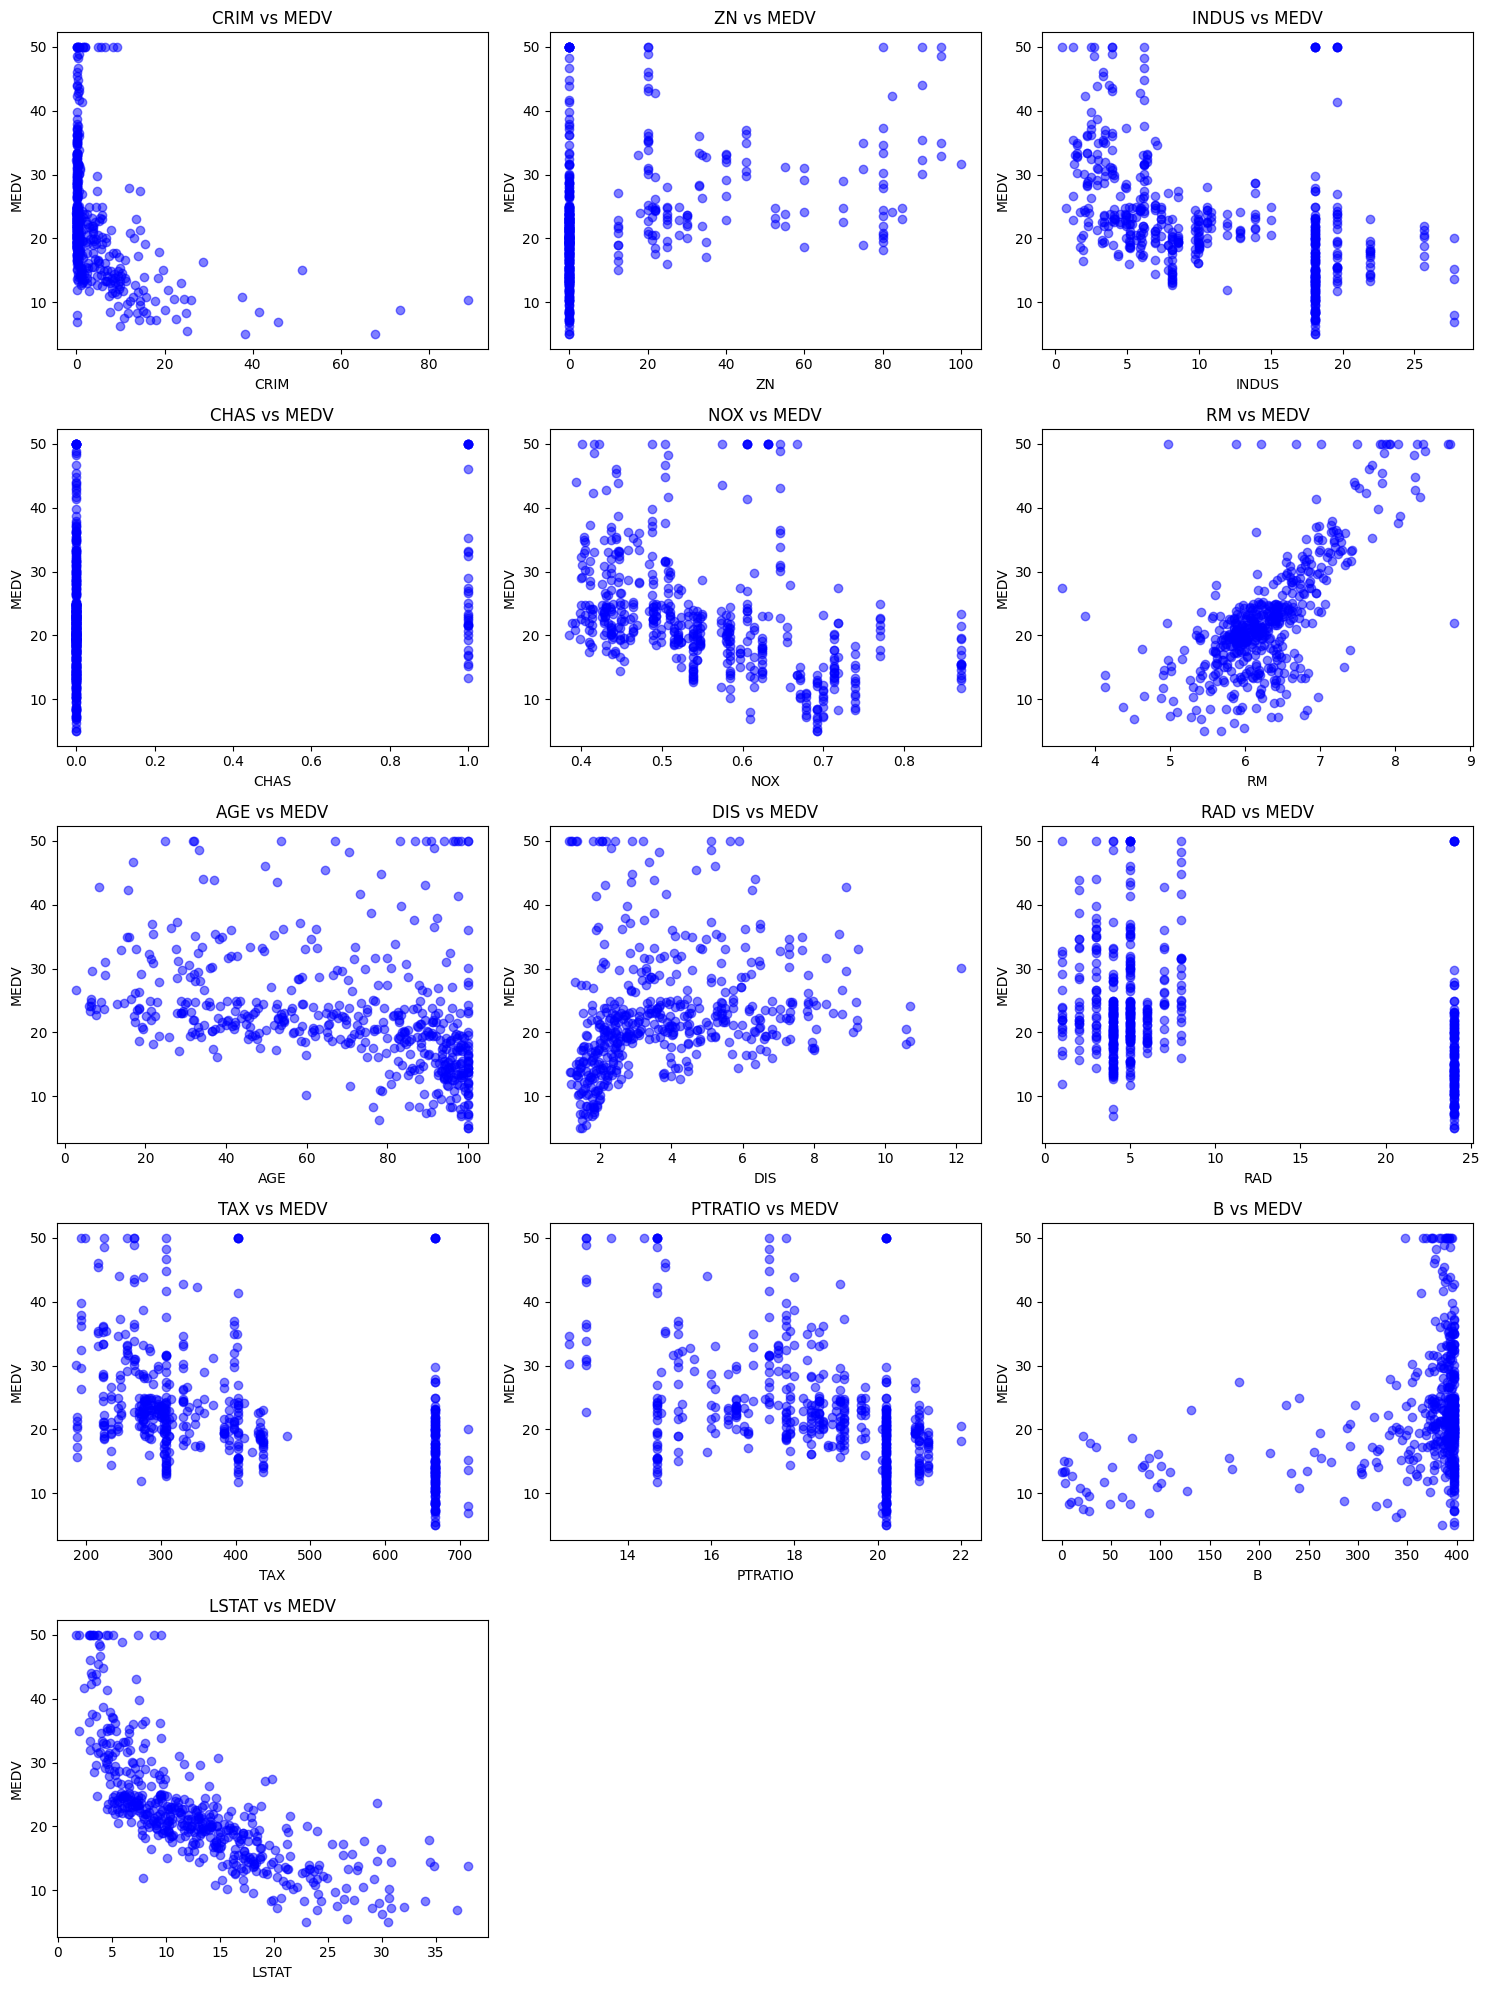

In [14]:
import matplotlib.pyplot as plt

features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target = 'MEDV'

plt.figure(figsize=(15, 20))

for i, col in enumerate(features, 1):
    plt.subplot(5, 3, i)
    plt.scatter(df[col], df[target], alpha=0.5, c='blue')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f'{col} vs {target}')

plt.tight_layout()
plt.show()

# Model

In [15]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
model = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
model.fit(X_scaled)

IsolationForest(random_state=42)

In [17]:
predictions = model.predict(X_scaled)
anomalies_count = np.sum(predictions == -1)
print(f"Number of detected anomalies: {anomalies_count} out of {len(df)}")
df['Anomaly'] = np.where(predictions == -1, 'Anomaly', 'Normal')
print(df[df['Anomaly'] == 'Anomaly'].head())

Number of detected anomalies: 65 out of 506
        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
54   0.01360  75.0   4.00     0  0.410  5.888   47.6  7.3197    3  469.0   
141  1.62864   0.0  21.89     0  0.624  5.019  100.0  1.4394    4  437.0   
142  3.32105   0.0  19.58     1  0.871  5.403  100.0  1.3216    5  403.0   
144  2.77974   0.0  19.58     0  0.871  4.903   97.8  1.3459    5  403.0   
145  2.37934   0.0  19.58     0  0.871  6.130  100.0  1.4191    5  403.0   

     PTRATIO       B  LSTAT  MEDV  Anomaly  
54      21.1  396.90  14.80  18.9  Anomaly  
141     21.2  396.90  34.41  14.4  Anomaly  
142     14.7  396.90  26.82  13.4  Anomaly  
144     14.7  396.90  29.29  11.8  Anomaly  
145     14.7  172.91  27.80  13.8  Anomaly  


In [20]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Anomaly
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,Normal
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,Normal
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,Normal
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,Normal
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4,Normal
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6,Normal
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9,Normal
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0,Normal


In [22]:
new_data = np.array([[0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.0900, 1, 296.0, 15.3, 396.90, 4.98, 24.0]])
# Scale الnew data
new_data_scaled = scaler.transform(new_data)

# Predict
new_prediction = model.predict(new_data_scaled)
print("New data prediction:", "Anomaly" if new_prediction[0] == -1 else "Normal")

New data prediction: Normal


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Visualizing and Analyzing Detected Anomalies in the Boston Housing Datase

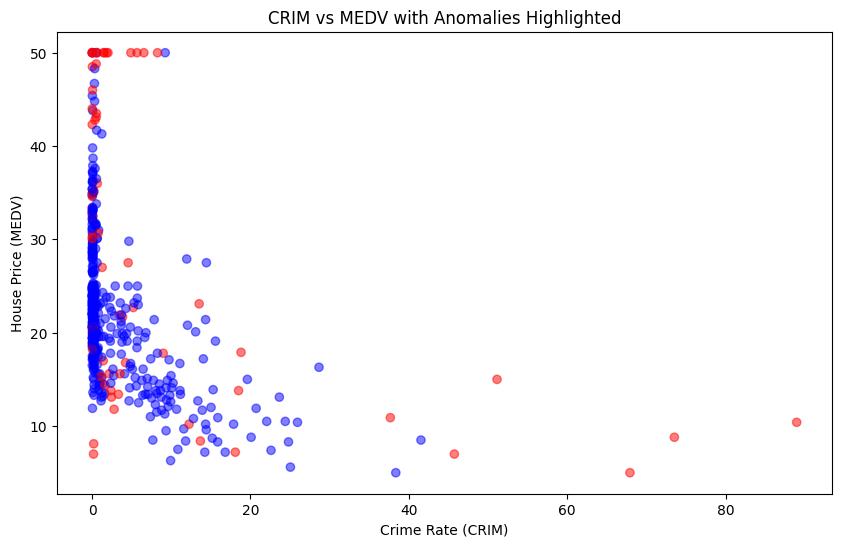

Anomalies Statistical Summary:
             CRIM         ZN      INDUS       CHAS        NOX         RM  \
count  65.000000  65.000000  65.000000  65.000000  65.000000  65.000000   
mean    8.464480  24.761538  12.498000   0.292308   0.607786   6.513908   
std    18.268619  36.112142   8.270558   0.458362   0.153408   1.230426   
min     0.013600   0.000000   0.460000   0.000000   0.385000   3.561000   
25%     0.061290   0.000000   3.970000   0.000000   0.431000   5.757000   
50%     1.463360   0.000000  18.100000   0.000000   0.624000   6.395000   
75%     5.201770  40.000000  18.100000   1.000000   0.693000   7.489000   
max    88.976200  95.000000  27.740000   1.000000   0.871000   8.780000   

              AGE        DIS        RAD         TAX    PTRATIO           B  \
count   65.000000  65.000000  65.000000   65.000000  65.000000   65.000000   
mean    72.946154   3.448248  10.861538  453.384615  17.203077  317.392769   
std     30.571709   2.802162   9.527718  178.415920   3.09

In [23]:
predictions = model.predict(X_scaled)
df['Anomaly'] = np.where(predictions == -1, 'Anomaly', 'Normal')

plt.figure(figsize=(10, 6))
plt.scatter(df['CRIM'], df['MEDV'], c=df['Anomaly'].map({'Normal': 'blue', 'Anomaly': 'red'}), alpha=0.5)
plt.xlabel('Crime Rate (CRIM)')
plt.ylabel('House Price (MEDV)')
plt.title('CRIM vs MEDV with Anomalies Highlighted')
plt.show()


anomaly_df = df[df['Anomaly'] == 'Anomaly']
print("Anomalies Statistical Summary:\n", anomaly_df.describe())

# Comparing Feature Averages Between Normal and Anomalous Houses

In [24]:
normal_df = df[df['Anomaly'] == 'Normal']
print("Normal Data Summary:\n", normal_df[['CRIM', 'RM', 'MEDV']].mean())
print("\nAnomaly Data Summary:\n", anomaly_df[['CRIM', 'RM', 'MEDV']].mean())


Normal Data Summary:
 CRIM     2.898530
RM       6.250841
MEDV    21.646712
dtype: float64

Anomaly Data Summary:
 CRIM     8.464480
RM       6.513908
MEDV    28.544615
dtype: float64


Task 1 – Anomaly Detection (Boston Housing, Isolation Forest) — What I Did and Why

Goal (in plain English):
Build an unsupervised model that flags unusual homes (outliers/anomalies) in the Boston Housing dataset, and show that the same model can also flag anomalies for new inputs.


---

1) Get the data

What I did: Downloaded the dataset from Kaggle (Boston House Price) and loaded it into a pandas DataFrame df.
Why it matters: We need a clean table of numeric features to train any anomaly detector. I also verified that the CSV parsed correctly (some sources can load as a single column if the delimiter is misread).
Expected output: A DataFrame with columns like CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV.


---

2) Basic data health checks (EDA)

What I did:

Checked missing values with df.isnull().sum() to confirm the dataset is complete.

Printed a statistical summary with df.describe() to see ranges (min/max), central tendency (mean/median), and spread (std).


Why it matters:

Missing values or impossible ranges can look like anomalies, but they’re just data quality issues. We want to detect real outliers, so we confirm data quality first.


Expected output:

Missing values ideally all zeros.

Summary shows realistic ranges (e.g., CRIM right-skewed, RM around ~5–8, MEDV capped in many versions at 50.0).



---

3) Visual hints for outliers

What I did:

Plotted a boxplot for CRIM, RM, and MEDV to see extreme points.

Drew a scatter plot: CRIM (x) vs MEDV (y) to visualize the relationship between crime rate and price.


Why it matters:

Boxplots reveal potential outliers fast.

Scatter helps spot points that don’t follow the typical pattern (e.g., very high crime with very high price).


Expected output:

Boxplot dots outside the whiskers indicate possible outliers.

Scatter shows a general negative trend (higher CRIM → lower MEDV), with a few points deviating strongly.



---

4) Choose features and scale them

What I did:

Used all columns as features for detection (including MEDV) by copying df into X.

Applied StandardScaler to get X_scaled (mean 0, std 1 per feature).


Why it matters:

Including MEDV means we also detect price-based anomalies (e.g., a price that doesn’t match the rest of the attributes).

Scaling prevents big-magnitude features (like TAX) from dominating small ones (like binary CHAS).


Expected output:

A scaled numeric array with the same number of rows as df and all features standardized.



---

5) Train the anomaly detector (Isolation Forest)

What I did:

Initialized IsolationForest with n_estimators=100, contamination='auto', and a fixed random_state for reproducibility.

Trained it on X_scaled without any labels (unsupervised).


Why it matters (plain English):

Isolation Forest builds many random trees that split the data. Unusual points get isolated quickly (fewer splits), so they receive a more “anomalous” score and are labeled as anomalies.


Expected output:

A fitted model ready to score each row as Normal (1) or Anomaly (-1).



---

6) Flag anomalies in the dataset

What I did:

Ran predictions on the whole dataset: 1 = Normal, -1 = Anomaly.

Counted how many anomalies were found.

Added a new column Anomaly to df with values "Normal" / "Anomaly".

Printed a few example rows that were flagged.


Why it matters:

This shows the detector’s decisions and how common/rare anomalies are in this dataset.


Expected output:

A message like: Number of detected anomalies: X out of 506.

A small sample (e.g., first 5) of rows labeled "Anomaly" so we can inspect their values.



---

7) Visualize and analyze the flagged points

What I did:

Plotted CRIM vs MEDV again, but colored points by the model’s label (blue = Normal, red = Anomaly).

Calculated a statistical summary only for the anomalies.

Compared mean values of key features (CRIM, RM, MEDV) between Normal vs Anomaly groups.


Why it matters:

Visualization helps verify that red points are indeed unusual.

Comparing means shows whether anomalies differ in sensible ways (e.g., much higher CRIM, extreme RM, or unexpected MEDV given the other features).


Expected output:

A scatter with clearly highlighted red points.

Descriptive stats for anomalies showing notable differences.

Mean comparison where anomalies often have more extreme averages (e.g., higher CRIM or atypical MEDV).



---

8) Test on new input data

What I did:

Created a new row with the same feature order as training.

Applied the same scaler and used the model to predict "Normal" or "Anomaly".


Why it matters:

Proves the model can score unseen inputs, which is required by the task.


Expected output:

A message like: New data prediction: Normal (or Anomaly), depending on how unusual the new row is.



---

9) How Isolation Forest detects outliers (no math)

It builds many random trees that split features at random thresholds.

Rare/far points need fewer splits to be isolated from the rest of the data.

The model aggregates across trees: if a point is consistently isolated quickly, it gets labeled as an anomaly.

This works without labels and scales well to tabular data.



---

10) Interpreting the results

An anomaly is not necessarily a mistake; it can be a valid but rare combination (e.g., unusually high ZN with high PTRATIO and large DIS but mid-range MEDV).

Use the flagged rows to double-check data quality or to investigate interesting edge cases.

# If too many or too few points are flagged, adjust contamination (e.g., 0.05 for ~5% anomalies).